In [ ]:
import seaborn as sns #importing the libraries which are going to be used in this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('flight_price.xlsx') #loading the dataset
df.head(10) #would like to see first ten rows of the data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [ ]:
df.ndim #the given data has 2 dimensions

2

In [ ]:
df.shape #it represents the number of rows and columns

(10683, 11)

In [ ]:
df.dtypes #providing the data types of each column

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
df.info() #providing the information for the whole data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe() #providing the centra tendencies for the numerical data in the dataset

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.count() #counting the rows in each column

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [ ]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0] #we would like to take the date,month and year from the date of journey as our analysis would be easy to do
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [ ]:
df.drop('Date_of_Journey',axis=1,inplace=True) #dropping the column date of journey and changes needs to be done on actual dataset.

In [ ]:
df['Dep_Hours']=df['Dep_Time'].str.split(':').str[0] #we would like to take the hours and mins from the deperature time
df['Dep_Mins']=df['Dep_Time'].str.split(':').str[1]

In [ ]:
df.drop('Dep_Time',axis=1,inplace=True) #dropping the column deperature time and changes needs to be done on actual dataset.

In [ ]:
df['Arrival_Hrs']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0] #we would like to take the hours and mins from the arrival time as this columns contains time and date
df['Arrival_Mins']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [ ]:
def convert_into_minutes(Duration): #get the durations in minutes rather than hours and minutes
  total_minutes=0
  for i in Duration.split():
    if 'h' in i:
      total_minutes+=int(i.replace('h',''))*60 #if the given value is in hours, multiply it by 60 otherwise jump to next if statement
    if 'm' in i:
      total_minutes+=int(i.replace('m','')) #replcae 'm' with the blankspace
    return total_minutes

In [ ]:
df['Duration']=df['Duration'].apply(convert_into_minutes) #applying the changes in the desired column

In [ ]:
df.drop(['Route','Arrival_Time','Additional_Info'],axis=1,inplace=True) #dropping the columns

In [ ]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Dep_Hours,Dep_Mins,Arrival_Hrs,Arrival_Mins
0,IndiGo,Banglore,New Delhi,120,non-stop,3897,24,03,2019,22,20,01,10
1,Air India,Kolkata,Banglore,420,2 stops,7662,1,05,2019,05,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,06,2019,09,25,04,25
3,IndiGo,Kolkata,Banglore,300,1 stop,6218,12,05,2019,18,05,23,30
4,IndiGo,Banglore,New Delhi,240,1 stop,13302,01,03,2019,16,50,21,35


In [ ]:
df[['Date','Month','Year','Dep_Hours','Dep_Mins','Arrival_Hrs','Arrival_Mins']]=df[['Date','Month','Year','Dep_Hours','Dep_Mins','Arrival_Hrs','Arrival_Mins']].astype(int) #here we are changing the data type of the columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       10683 non-null  object
 1   Source        10683 non-null  object
 2   Destination   10683 non-null  object
 3   Duration      10683 non-null  int64 
 4   Total_Stops   10682 non-null  object
 5   Price         10683 non-null  int64 
 6   Date          10683 non-null  int64 
 7   Month         10683 non-null  int64 
 8   Year          10683 non-null  int64 
 9   Dep_Hours     10683 non-null  int64 
 10  Dep_Mins      10683 non-null  int64 
 11  Arrival_Hrs   10683 non-null  int64 
 12  Arrival_Mins  10683 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


<Figure size 1000x700 with 0 Axes>

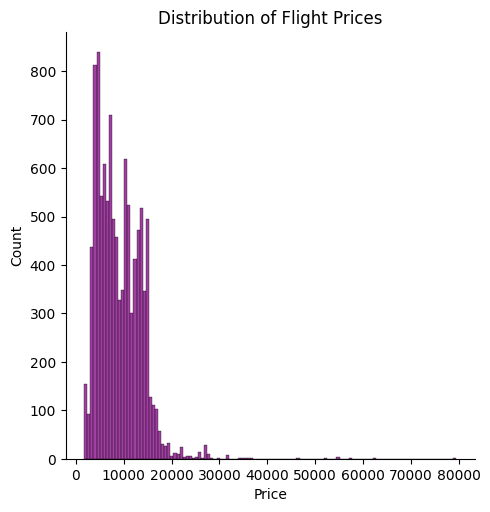

In [ ]:
plt.figure(figsize=(10,7))
sns.displot(df['Price'],kde=False,color='purple') #ploting a histogram of the price by setting the color as purple
plt.title('Distribution of Flight Prices') #providing title name
plt.show() #showing the histogram

In [ ]:
Price=df['Price'] #setting Price to the dataframe 'Price'
price_range=Price.max()-Price.min() #getting the range by subracting minimum price from maximum price
price_range

77753

In [ ]:
Price.max() #maximum value of the price

79512

In [ ]:
Price.min() #minimum value of the price

1759

<ipython-input-87-f0ba779d5d04>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Airline',y='Price',palette='rainbow',data=df,ci=None) #using barplot to see the price of flights vary by airline
<ipython-input-87-f0ba779d5d04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline',y='Price',palette='rainbow',data=df,ci=None) #using barplot to see the price of flights vary by airline


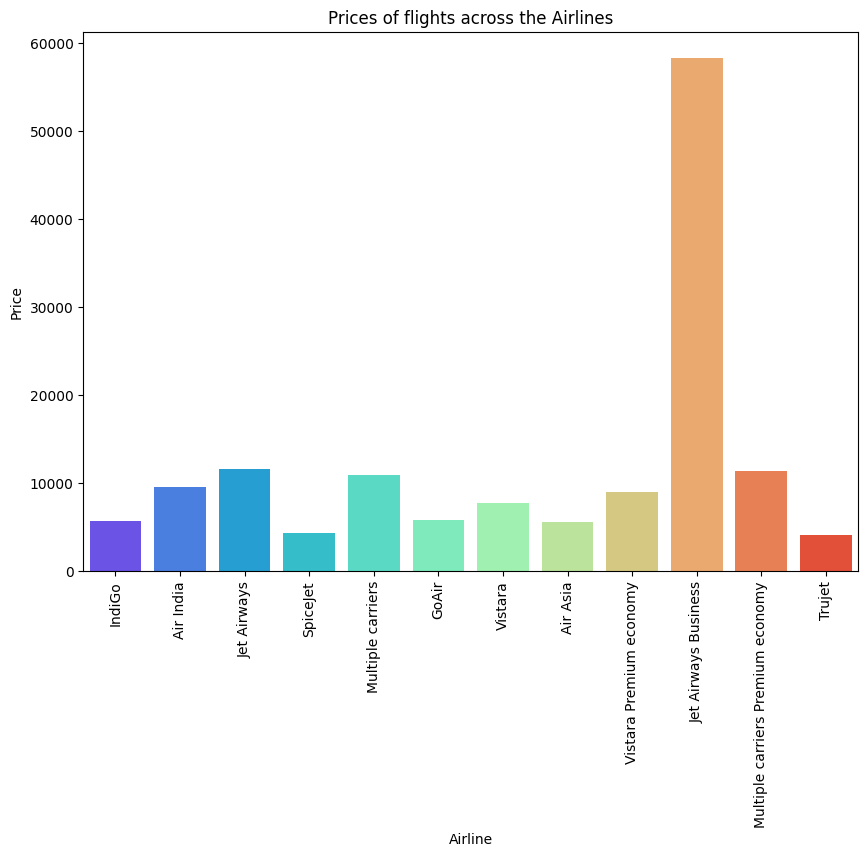

In [ ]:
plt.figure(figsize=(10,7)) #setting the figure size
sns.barplot(x='Airline',y='Price',palette='rainbow',data=df,ci=None) #using barplot to see the price of flights vary by airline
plt.xticks(rotation=90) #rotating the ticks on x-axis by 90 degree angle
plt.title('Prices of flights across the Airlines')
plt.show()

'As a lot of outliers can be seen in the first four Airlines, so it can skewed the central tendencies.\nThey can also affect the model performance by which the accuracy and reliability of the analysis results can not be appropriate '

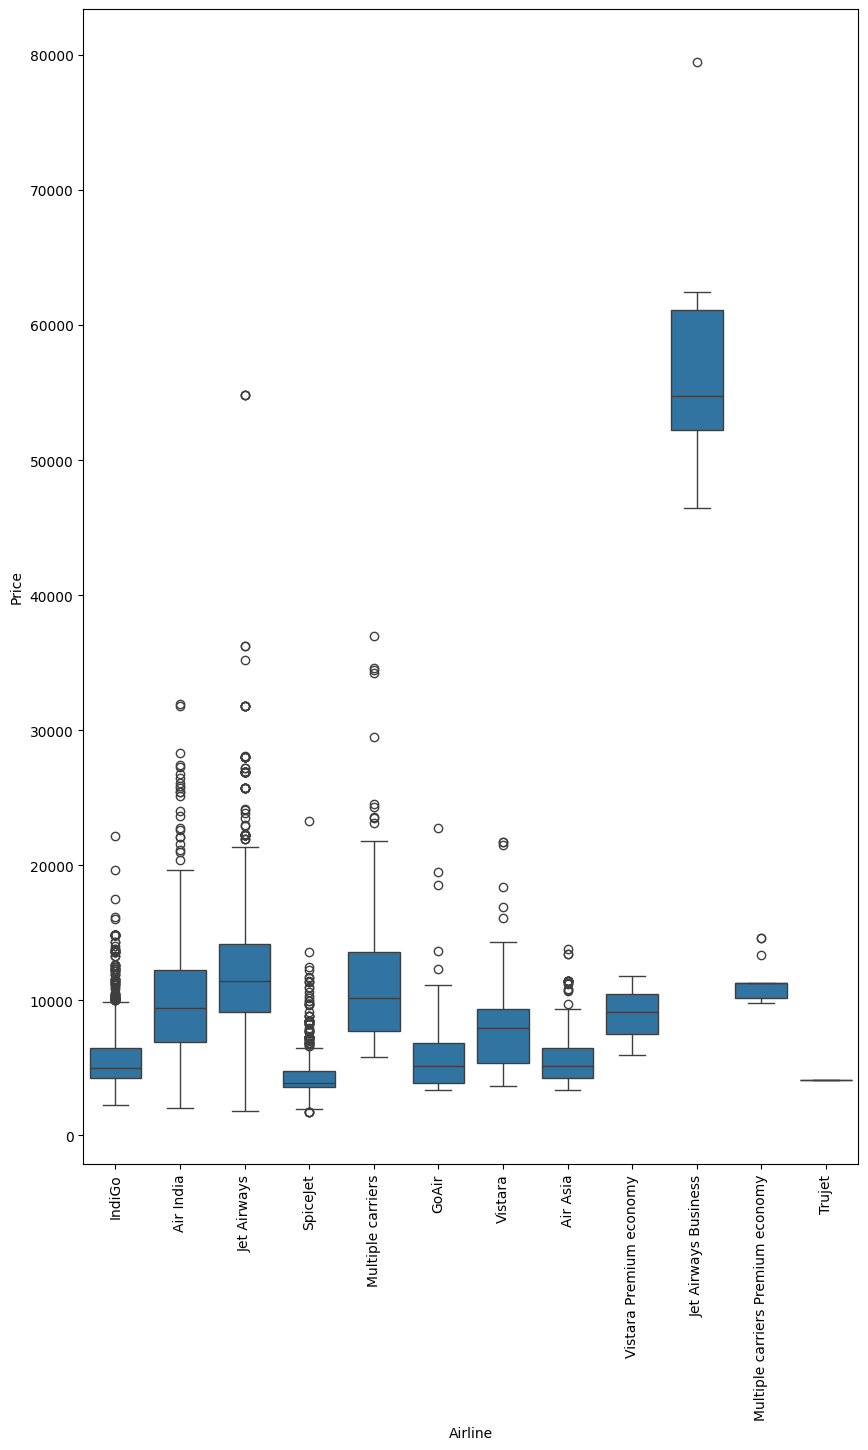

In [ ]:
plt.figure(figsize=(10,15))
sns.boxplot(x='Airline',y='Price',data=df) #getting the outliers by using boxplot
plt.xticks(rotation=90)
'''As a lot of outliers can be seen in the first four Airlines, so it can skewed the central tendencies.
They can also affect the model performance by which the accuracy and reliability of the analysis results can not be appropriate '''

In [ ]:
df2=df['Month'].value_counts()
df2

5    3466
6    3414
3    2724
4    1079
Name: Month, dtype: int64

<ipython-input-90-694bc58b5129>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df2.index,y=df2,palette='rainbow',ci=None) #using barplot to see the total counts of the flights by each month
<ipython-input-90-694bc58b5129>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df2.index,y=df2,palette='rainbow',ci=None) #using barplot to see the total counts of the flights by each month


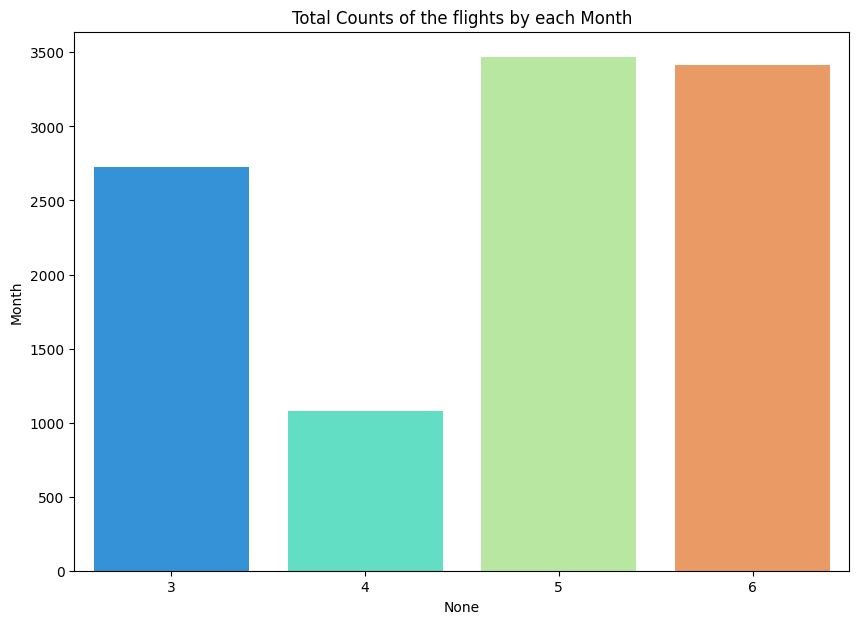

In [ ]:
plt.figure(figsize=(10,7)) #setting the figure size
sns.barplot(x=df2.index,y=df2,palette='rainbow',ci=None) #using barplot to see the total counts of the flights by each month
plt.title('Total Counts of the flights by each Month')
plt.show()
#most number of flights can be seen in month of May

<ipython-input-91-7a635bf1c8c9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=destination_counts_may.index, y=destination_counts_may, palette='viridis')


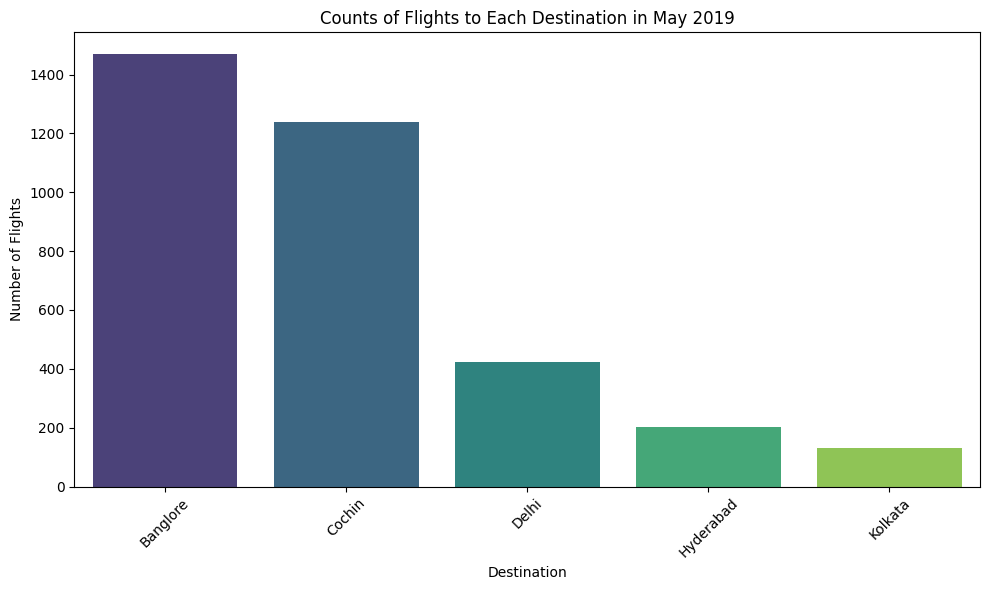

<ipython-input-91-7a635bf1c8c9>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_counts_may.index, y=airline_counts_may, palette='magma')


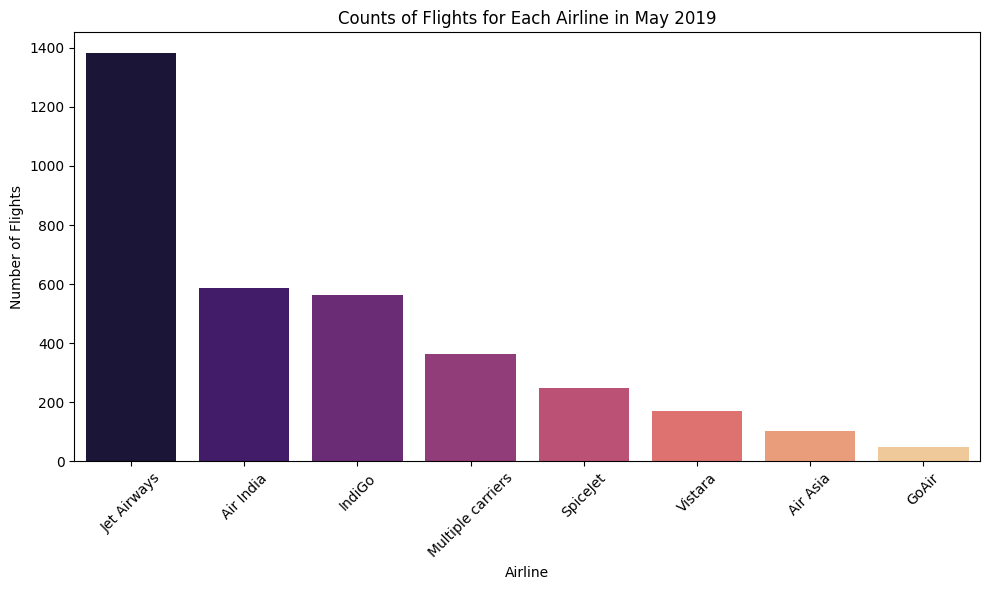

Most popular destination in May 2019: Banglore
Most used airline in May 2019: Jet Airways


In [ ]:
# Convert 'Month' to string format with leading zeros if needed
df['Month'] = df['Month'].astype(str).str.zfill(2)

# Filter for May ('05')
may_flights = df[df['Month'] == '05']

# Count flights to each destination in May
destination_counts_may = may_flights['Destination'].value_counts()

# Plotting the counts of flights to each destination in May 2019
plt.figure(figsize=(10, 6))
sns.barplot(x=destination_counts_may.index, y=destination_counts_may, palette='viridis')
plt.title('Counts of Flights to Each Destination in May 2019')
plt.xlabel('Destination')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Determine the most popular destination in May by using index
most_popular_destination_may = destination_counts_may.idxmax()

# Count flights for each airline in May
airline_counts_may = may_flights['Airline'].value_counts()

# Plotting the counts of flights for each airline in May 2019
plt.figure(figsize=(10, 6))
sns.barplot(x=airline_counts_may.index, y=airline_counts_may, palette='magma')
plt.title('Counts of Flights for Each Airline in May 2019')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Determine the most used airline in May
most_used_airline_may = airline_counts_may.idxmax()

print("Most popular destination in May 2019:", most_popular_destination_may)
print("Most used airline in May 2019:", most_used_airline_may)


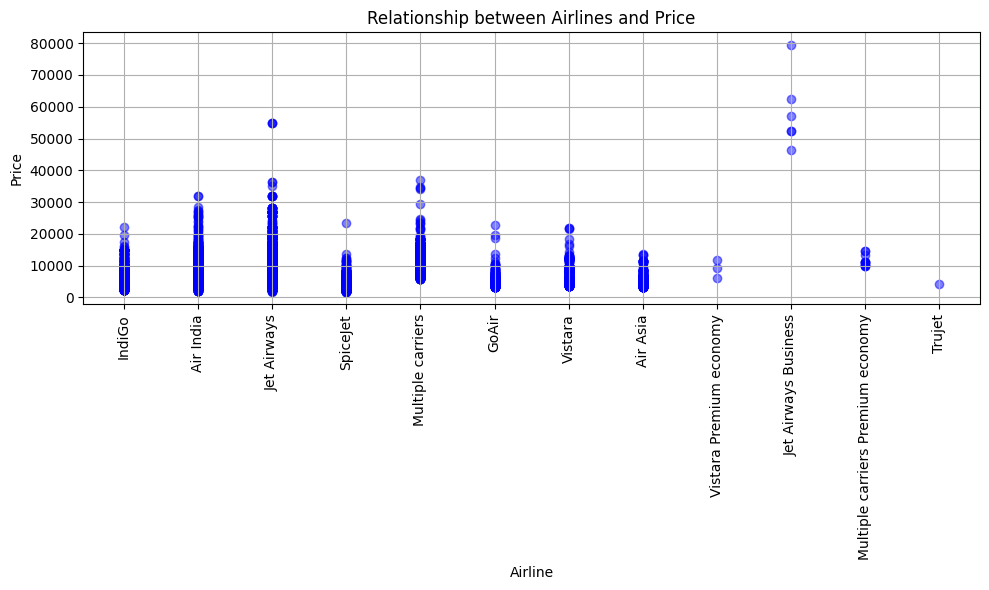

' We are unable to see any trends between airlines and price.\n'

In [ ]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Airline'], df['Price'], alpha=0.5, color='blue')
plt.title('Relationship between Airlines and Price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()
''' We are unable to see any trends between airlines and price.
'''

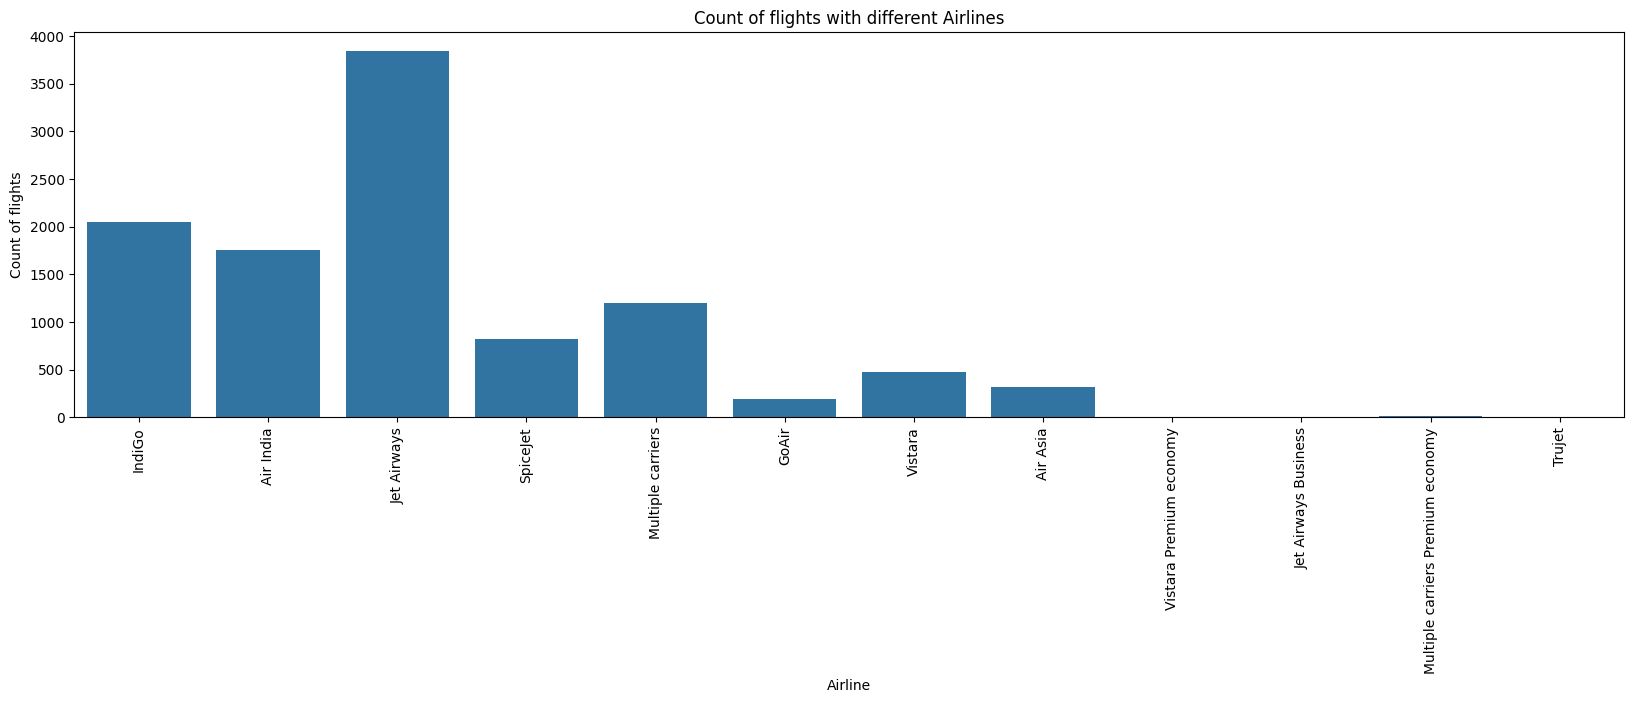

' We can see that People love to take jet airways as the double of the Indigo. But the prices of the Indigo, Air India and Jet airways lies same.\n'

In [ ]:
#plotting the bar plot
plt.figure(figsize=(20, 5))
plt.title('Count of flights with different Airlines')
ax = sns.countplot(x='Airline', data=df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation=90)
plt.show()
''' We can see that People love to take jet airways as the double of the Indigo. But the prices of the Indigo, Air India and Jet airways lies same.
'''

In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
#label coding which can help us in heatmap to view the correlation between different features
df['Airline']=df['Airline'].map({'Jet Airways':0,'IndiGo':1,'Air India':2,'Multiple carriers':3,'SpiceJet':4,'Vistara':5,'Air Asia':6,'GoAir':7,'Multiple carriers Premium economy':3,'Jet Airways Business':0,'Vistara Premium economy':5,'Trujet':4})

In [ ]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
df['Source']=df['Source'].map({'Delhi':0,'Kolkata':1,'Banglore':2,'Mumbai':3,'Chennai':4})

In [ ]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
df['Destination']=df['Destination'].map({'Delhi':0,'New Delhi':1,'Kolkata':2,'Banglore':3,'Cochin':4,'Hyderabad':5})

<ipython-input-102-a55b5f2a2a0c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


'by plotting the heatmap, we can conlcude that moderately total stops are affecting the flight prices but may be there are some unidentified method which will affect the flight prices.\n'

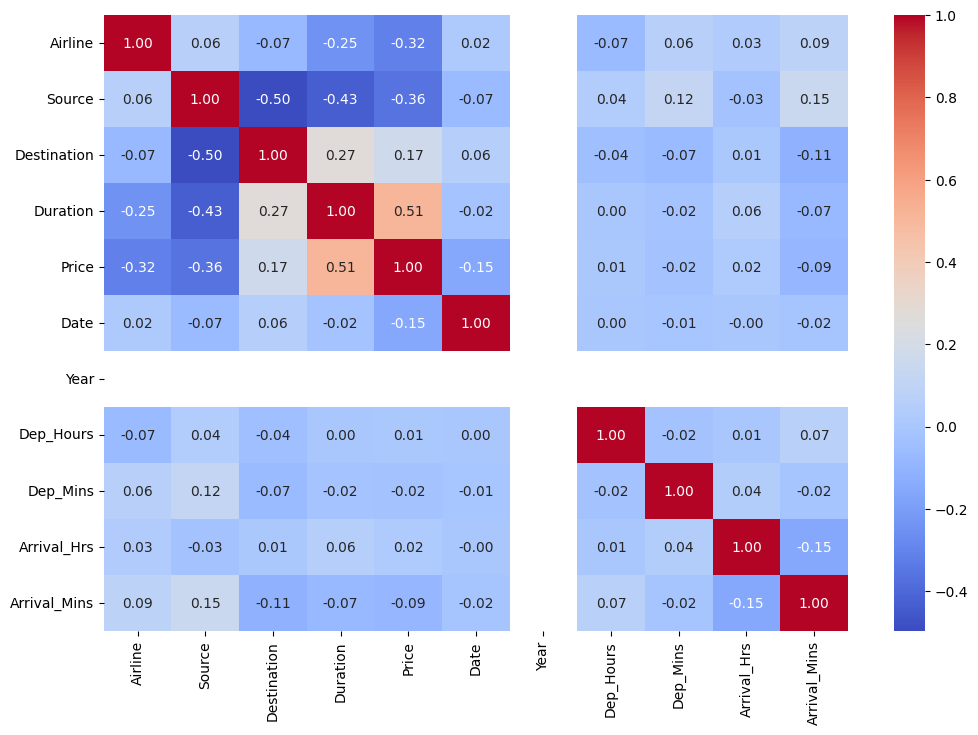

In [ ]:
#plotting heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
'''by plotting the heatmap, we can conlcude that moderately total stops are affecting the flight prices but may be there are some unidentified features which will affect the flight prices.
'''